<h3> Dataset detail </h3>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain attributes.

<h3> Atrribute info</h3>

Pregnancies-Number of times pregnant

Glucose-Plasma glucose concentration after 2 hours in an oral glucose tolerance test

BloodPressure-Diastolic blood pressure (mm Hg)

SkinThickness-Triceps skin fold thickness (mm)

Insulin-2-Hour serum insulin (mu U/ml)

BMI-Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction-Diabetes pedigree function

Age-Age (years)

Outcome-Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [0]:
!pip install pandas --upgrade
!pip install pandas-profiling --upgrade

In [0]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('diabetes.csv')
dataset = data

In [0]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


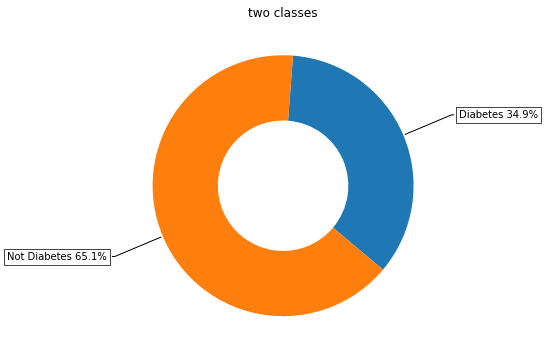

In [0]:

y_value_counts = data['Outcome'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

class1 = str(round((y_value_counts[1]/(y_value_counts[1]+y_value_counts[0])*100),2))
class2 = str(round((y_value_counts[0]/(y_value_counts[1]+y_value_counts[0])*100),2))

recipe = ["Diabetes "+class1+"%", "Not Diabetes "+class2+"%"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("two classes")

plt.show()

In [0]:
profiling = pandas_profiling.ProfileReport(data)

In [0]:
profiling.to_file("profiling.html")

Missing Values

In [0]:
columns = list(data.columns)

missing_value = {}
for i in columns:
  count = 0
  for j in list(data[i]):
    if(j == 0):
      count = count +1
  missing_value[i] = count

print(missing_value)

{'Pregnancies': 111, 'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'Outcome': 500}


Replace missing values 0 with Nan

In [0]:
import numpy
col = [columns[1],columns[2],columns[3],columns[4],columns[5]]
data[col] = data[col].replace(0, numpy.NaN)

In [0]:
data.shape    #shape before removing missing values rows

(768, 9)

removing missing value rows

In [0]:
data.dropna(inplace=True)

In [0]:
data.shape    #shape after removing missing values rows

(392, 9)

In [0]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

y = data[['Outcome']]
#split dataset in train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=345,stratify=y)

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train,y_train)

In [0]:
clf1.score(X_test,y_test)

0.7457627118644068

impute data

In [0]:
data = pd.read_csv('/content/diabetes.csv')
data[col] = data[col].replace(0, numpy.NaN)

In [0]:
data.shape

(768, 9)

replace missing value with their respective mean

In [0]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=numpy.NaN, strategy='mean')

data[col] = imp_mean.fit_transform(data[col])

In [0]:
data.shape

(768, 9)

In [0]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

y = data[['Outcome']]
#split dataset in train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=345,stratify=y)

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train,y_train)

print(clf.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7532467532467533


replacing missing value with median

In [0]:
data = pd.read_csv('/content/diabetes.csv')
data[col] = data[col].replace(0, numpy.NaN)

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=numpy.NaN, strategy='median')

data[col] = imp_mean.fit_transform(data[col])

X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

y = data[['Outcome']]
#split dataset in train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=345,stratify=y)

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train,y_train)

print(clf.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7575757575757576


replacing missing value with most frequent value

In [0]:
data = pd.read_csv('/content/diabetes.csv')
data[col] = data[col].replace(0, numpy.NaN)

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=numpy.NaN, strategy='most_frequent')

data[col] = imp_mean.fit_transform(data[col])

X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

y = data[['Outcome']]
#split dataset in train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=345,stratify=y)

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train,y_train)

print(clf.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7532467532467533


Summary of missing value analysis

In [0]:
from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ['method applied for handling missing value','accuracy_measure']
table.add_row(['removing missing value rows','74.57'])
table.add_row(['replace with mean','75.32'])
table.add_row(['replace with median','75.75'])
table.add_row(['replace with most frequent value','75.32'])

print(table)

+-------------------------------------------+------------------+
| method applied for handling missing value | accuracy_measure |
+-------------------------------------------+------------------+
|        removing missing value rows        |      74.57       |
|             replace with mean             |      75.32       |
|            replace with median            |      75.75       |
|      replace with most frequent value     |      75.32       |
+-------------------------------------------+------------------+


Handling imbalanced dataset

In [0]:
def count(X):
  unique_elements, counts_elements = np.unique(X, return_counts=True)
  counter = {}
  for i in range(0,len(unique_elements)):
    counter[unique_elements[i]] = counts_elements[i]
  return counter

In [0]:
import numpy as np
count(y)

{0: 500, 1: 268}

In [0]:
data = pd.read_csv('/content/diabetes.csv')
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data[['Outcome']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=345,stratify=y)

oversample only training dataset

random oversampling

In [0]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

print("data before oversampling:")
print(count(y_train))
X_res, y_res = ros.fit_resample(X_train, y_train)

print("\n data after oversampling:")
print(count(y_res))

data before oversampling:
{0: 350, 1: 187}

 data after oversampling:
{0: 350, 1: 350}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


effect of oversampling on dataset

In [0]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_res,y_res)

print(clf.score(X_test,y_test))

0.7359307359307359


using Adasyn

In [0]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42, n_neighbors=3)

print("data before oversampling:")
print(count(y_train))

X_res, y_res = ada.fit_resample(X_train, y_train)
print("\n data after oversampling:")
print(count(y_res))

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_res,y_res)

print("accuracy:")
print(clf.score(X_test,y_test))

data before oversampling:
{0: 350, 1: 187}

 data after oversampling:
{0: 350, 1: 368}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


accuracy:
0.696969696969697


using borderling smote

In [0]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42,k_neighbors = 3, m_neighbors = 3)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("\n data after oversampling:")
print(count(y_res))

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_res,y_res)

print("accuracy:")
print(clf.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F


 data after oversampling:
{0: 350, 1: 350}
accuracy:
0.6623376623376623


oversampling whole dataset

In [0]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print("\n data after oversampling:")
print(count(y_res))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=345,stratify=y_res)

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train,y_train)

print("accuracy:")
print(clf.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 data after oversampling:
{0: 500, 1: 500}
accuracy:
0.7233333333333334


In [0]:
acc = list()
for i in columns:
  from sklearn.model_selection import train_test_split
  X = data[[i]]
  y = data['Outcome']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=345,stratify=y)

  from sklearn.svm import SVC
  clf = SVC(kernel = 'linear')
  clf.fit(X_train,y_train)
  acc.append(clf.score(X_test,y_test))

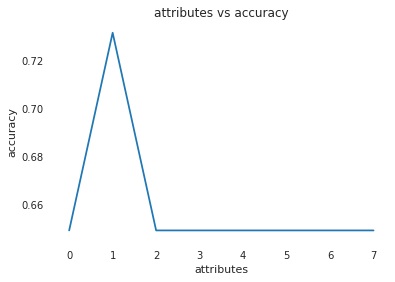

In [0]:
# Plot
plt.plot(range(0,8), acc)
plt.ylabel('accuracy')
plt.xlabel('attributes')
plt.title('attributes vs accuracy')
plt.show()

<h3>Visualization

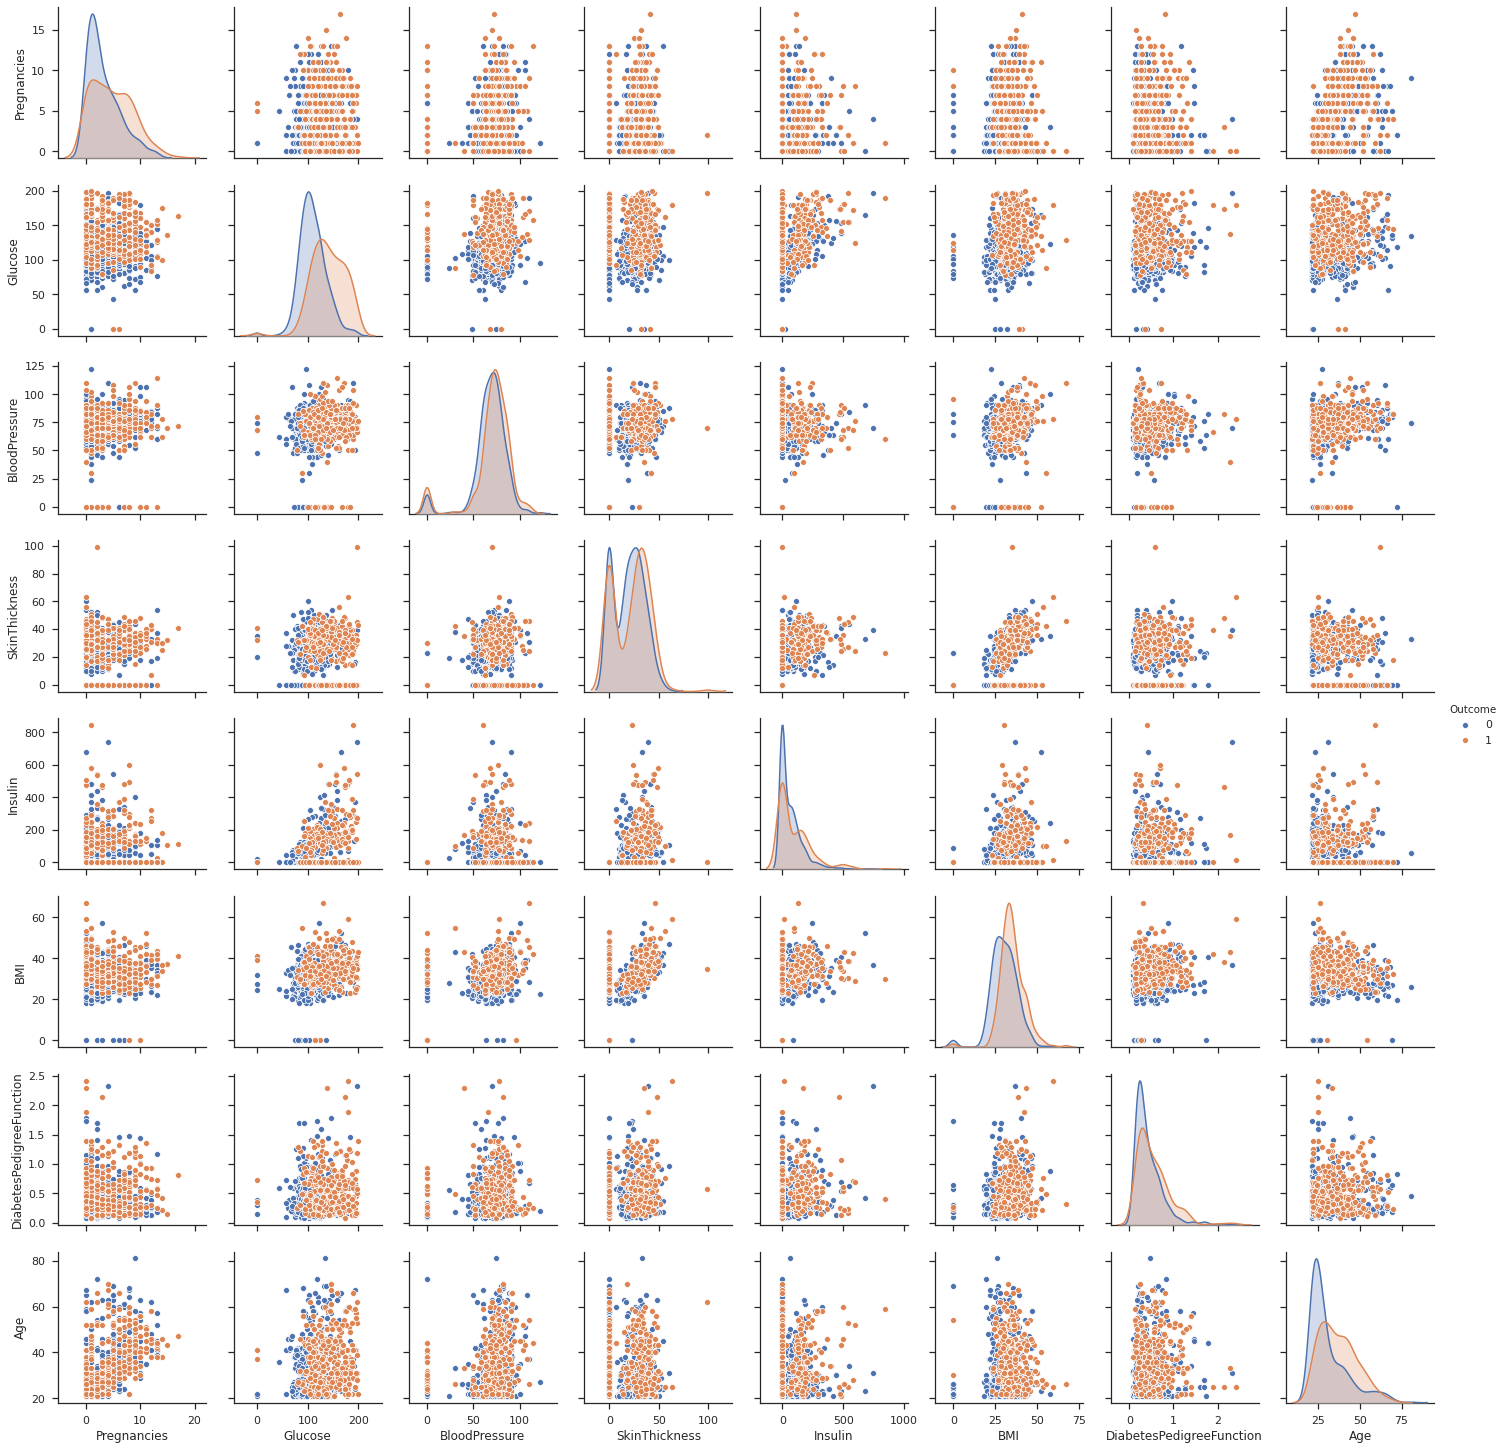

In [0]:
import seaborn as sns
sns.set(style="ticks")

# df = sns.load_dataset("iris")
sns.pairplot(data, hue="Outcome")

pairplot are useful to find which attributes are better to separate the data classwise

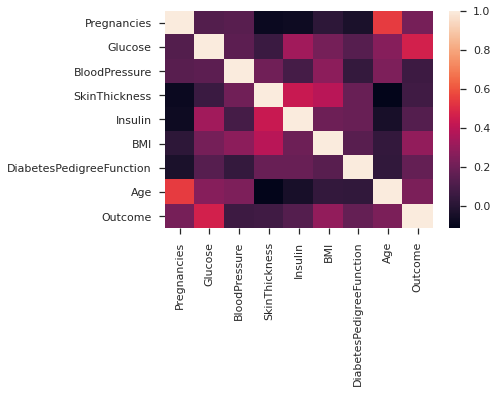

In [0]:
	# Calculate correlations
corr = data.corr(method='pearson')
 
# Heatmap
sns.heatmap(corr)

heatmap are useful to check which attributes are highly correlated.

1. from profiling of dataset we can see that there aree multiple attributes with having value zero which seems to be missing value but it is not the case for all attribute for e.g for preganicies it can be zero but zero for blood pressure seems incorrect.

2. from corelation matrix it is clear that no attribute is strongle correlated with each other so it is necessary to consider all attributes for our training

3. using attribute information first we can replace missing value with NaN and then it can be replaced with mean, median, mode or missing value rows can be eliminated.

4. Replacing missing value with median gives max accuracy of 75.75%

5. class0 : 500 ,class1 : 268 
  as both class are imbalanced so using oversampling technique this can be tackled

6. Oversampling can be done on whole dataset or just on training set. Each case is explored above we get max accuracy of 73.59 in random oversampling of training set.

7. from above graph it is clear that Glucose test is capable of identifying if a person has diabetes or not

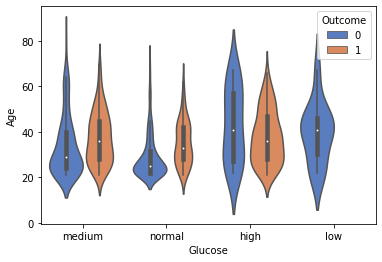

In [0]:
ax = sns.violinplot(x=temp['Glucose'], y="Age", hue="Outcome",data=data, palette="muted")

**Hypothsis test to check which are dependent to class variable**

In [0]:
from scipy.stats import chi2
def chi_square(col1,col2):
  crosstab = pd.crosstab(col1,col2)#,margins=True, margins_name="Total",rownames=['Glucose'],colnames=['Outcome'])

  rows = list(crosstab.index.values)
  cols = list(crosstab.columns.values)

  ar=crosstab.values   
  df=pd.DataFrame(ar, columns=cols)
  df.index=rows

  df2=df.copy() # create contingency table with the marginal totals and the grand total. 
  df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
  df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)

  n=df2.at["Column_Total", "Row_Total"]  # grand total
  print("contigency table")
  print("actual values")
  print(df2)

  exp=df2.copy()               # create dataframe with expected counts
  for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        # round expected values to 6 decimal places to get the maximum available precision:
        v= (((df2.at[x, "Row_Total"]) * (df2.at["Column_Total", y])   )   /n ).round(6) 
        exp.at[x,y]=float(v)

  exp = exp.iloc[[i for i in range(len(rows))], [i for i in range(len(cols))]]
  print("\n\nexpected values")
  print(exp)

  tstat = np.sum(((df-exp)**2/exp).values) # calculate chi-squared test statistic
  print("\nchi squared value:",tstat)

  dof = (len(df.columns)-1)*(len(df.index)-1) # determine degrees of freedom 
  print("degree of freedom:",dof)


  pval=1-chi2.cdf(tstat, dof) # subtract the cumulative distribution function from 1
  print("p value:",pval)

In [0]:
import numpy

data = pd.read_csv('/content/diabetes.csv')
columns = list(data.columns)
col = [columns[1],columns[2],columns[3],columns[4],columns[5]]

data[col] = data[col].replace(0, numpy.NaN)

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=numpy.NaN, strategy='median')

data[col] = imp_mean.fit_transform(data[col])

First we check for `data['Glucose']` and `data['Outcome']` for that we need to change numerical value of Glucose feature to categorical variable for that we divided Glucose level into 4 different categories 
1. low = 70
2. normal = 70-120
3. medium = 120-160
4. high = 160  

this categories for Glucose level are found from from this [link](https://www.medicalnewstoday.com/articles/317536#interpreting-the-results)



In [0]:
temp1 = []
for i in range(len(temp)):
  if(temp[i]<70):
    temp1.append('low')
  
  elif(temp[i]>=70 and temp[i]<120):
    temp1.append('normal')
  
  elif(temp[i]>=120 and temp[i]<160):
    temp1.append('medium')
  
  else:
    temp1.append('high')

temp = pd.DataFrame()
temp['Glucose'] = temp1

In [0]:
chi_square(temp['Glucose'],data['Outcome'])

contigency table
actual values
                0    1  Row_Total
high           18   84        102
low            11    0         11
medium        144  114        258
normal        327   70        397
Column_Total  500  268        768


expected values
          0    1
high     66   35
low       7    3
medium  167   90
normal  258  138

chi squared value: 170.32320461436848
degree of freedom: 3
p value: 0.0


P value is very low and chi square statistic value is very high this means that Glucose level is highly dependent on Outcome which was expected as diabetes is highly dependent on Glucose level.

Similarly we can check for other features also but first they need to be categorized